# <center> **Introductory Analysis For Biomedical Data Study** </center>

In [1]:
## Loading Librarbies and Checking For Availability
try:
    import pandas as pd
    print("Library is available.")
    import math
    print("Library is available.")
    import scipy.stats as stats
    print("Library is available.")
    import matplotlib.pyplot as plt
    print("Library is available.")
    import seaborn as sns
    print("Library is available.")
    
except ImportError:
    print("Library is not available.")

## Changing Potential Options
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Library is available.
Library is available.
Library is available.
Library is available.
Library is available.


In [2]:
## Loading Dataset And Viewing
health = pd.read_excel('health_cleaned_python.xlsx')
 
health.head(10)

,Date,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
0,2024-01-26,275.6,47.5,17.0,95.7,113,73,74,97.4,128,79,73,11.5,39.54,35.19,1,1,1465.00,189.50,50.50,73.00,19.00,67.50,17.00,0.50,454.50
1,2024-01-27,271.8,47.0,17.0,96.2,114,75,67,97.8,108,75,82,5.5,38.99,34.57,1,0,2521.00,499.95,85.00,71.50,34.50,325.45,72.50,0.75,765.00
2,2024-01-28,271.8,47.0,17.0,96.7,136,76,71,96.1,112,63,70,8.0,38.99,34.57,0,0,1385.19,172.41,39.08,74.29,41.21,66.44,16.35,0.50,351.68
3,2024-01-29,272.8,47.0,17.0,97.5,131,85,76,97.1,158,88,86,8.0,39.14,34.57,1,0,570.00,108.00,12.00,4.00,8.00,46.00,6.00,0.50,108.00
4,2024-01-30,269.6,46.5,17.0,97.7,123,79,84,98.6,120,71,81,10.0,38.68,33.95,1,1,1946.33,259.04,60.10,104.33,47.73,67.67,19.30,2.00,540.88
5,2024-01-31,268.6,47.0,17.0,96.1,132,75,62,96.5,156,83,73,9.0,38.54,34.57,1,0,1265.23,195.20,34.86,69.58,42.56,96.87,20.90,1.50,313.76
6,2024-02-01,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,10.0,38.56,33.95,1,1,2167.33,309.47,70.80,67.88,19.91,213.35,17.50,1.00,637.21
7,2024-02-02,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,0.0,38.56,33.95,0,0,4080.00,349.00,229.00,163.00,15.00,91.00,12.00,0.00,2061.00
8,2024-02-03,269.4,47.0,17.0,97.7,120,77,76,96.5,124,75,66,16.5,38.65,34.57,1,0,2535.93,235.18,120.44,99.95,25.37,30.09,35.00,2.00,1083.97
9,2024-02-04,272.6,47.0,17.0,96.7,119,75,71,96.4,116,74,68,10.0,39.11,34.57,1,0,1635.93,139.18,82.44,78.45,21.87,20.59,21.50,2.00,741.97


In [3]:
## Creating Subset To Analyze
subset = health[health.columns[1:26]] 
subset.head(10)

,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
0,275.6,47.5,17.0,95.7,113,73,74,97.4,128,79,73,11.5,39.54,35.19,1,1,1465.00,189.50,50.50,73.00,19.00,67.50,17.00,0.50,454.50
1,271.8,47.0,17.0,96.2,114,75,67,97.8,108,75,82,5.5,38.99,34.57,1,0,2521.00,499.95,85.00,71.50,34.50,325.45,72.50,0.75,765.00
2,271.8,47.0,17.0,96.7,136,76,71,96.1,112,63,70,8.0,38.99,34.57,0,0,1385.19,172.41,39.08,74.29,41.21,66.44,16.35,0.50,351.68
3,272.8,47.0,17.0,97.5,131,85,76,97.1,158,88,86,8.0,39.14,34.57,1,0,570.00,108.00,12.00,4.00,8.00,46.00,6.00,0.50,108.00
4,269.6,46.5,17.0,97.7,123,79,84,98.6,120,71,81,10.0,38.68,33.95,1,1,1946.33,259.04,60.10,104.33,47.73,67.67,19.30,2.00,540.88
5,268.6,47.0,17.0,96.1,132,75,62,96.5,156,83,73,9.0,38.54,34.57,1,0,1265.23,195.20,34.86,69.58,42.56,96.87,20.90,1.50,313.76
6,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,10.0,38.56,33.95,1,1,2167.33,309.47,70.80,67.88,19.91,213.35,17.50,1.00,637.21
7,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,0.0,38.56,33.95,0,0,4080.00,349.00,229.00,163.00,15.00,91.00,12.00,0.00,2061.00
8,269.4,47.0,17.0,97.7,120,77,76,96.5,124,75,66,16.5,38.65,34.57,1,0,2535.93,235.18,120.44,99.95,25.37,30.09,35.00,2.00,1083.97
9,272.6,47.0,17.0,96.7,119,75,71,96.4,116,74,68,10.0,39.11,34.57,1,0,1635.93,139.18,82.44,78.45,21.87,20.59,21.50,2.00,741.97


In [4]:
## Summary Statistics Of All Variables
subset.describe()

,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
count,226.000000,226.00000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,255.115044,44.45354,16.628319,96.578805,131.654867,77.128319,71.234513,97.256637,134.203540,76.442478,73.159292,7.860619,36.601195,31.747788,0.522124,0.415929,2914.355708,397.844977,105.429132,101.344201,27.785434,239.288995,56.434795,1.102511,942.016804
std,5.951645,0.91957,0.233607,0.711888,9.129946,6.013052,8.147139,0.680833,11.509346,6.621095,9.235743,3.493397,0.853745,1.084075,0.500619,0.493976,1808.868451,273.095431,70.700295,46.535141,17.725397,193.683084,41.216249,0.890321,632.019923
min,244.200000,43.00000,16.000000,94.200000,106.000000,42.000000,55.000000,95.400000,104.000000,58.000000,53.000000,0.000000,35.040000,29.940000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,251.250000,44.00000,16.500000,96.125000,127.000000,74.000000,66.000000,96.900000,127.000000,72.000000,67.000000,6.000000,36.047500,30.640000,0.000000,0.000000,1513.865000,151.370000,55.635000,68.530000,10.420000,51.087500,17.675000,0.500000,500.675000
50%,253.900000,44.50000,16.500000,96.500000,132.000000,77.000000,70.000000,97.200000,134.000000,76.000000,72.000000,8.000000,36.425000,31.320000,1.000000,0.000000,2469.955000,327.970000,84.020000,95.950000,27.785434,214.015000,56.434795,1.000000,747.280000
75%,258.000000,45.00000,17.000000,96.900000,138.000000,81.000000,76.000000,97.700000,141.000000,80.000000,77.000000,10.000000,37.020000,32.000000,1.000000,1.000000,4033.452500,601.277500,135.075000,124.550000,40.325000,348.532500,80.750000,2.000000,1213.260000
max,275.600000,47.50000,17.000000,100.100000,160.000000,99.000000,99.000000,99.200000,162.000000,109.000000,99.000000,19.000000,39.540000,35.190000,1.000000,1.000000,8729.000000,1273.900000,327.470000,276.470000,80.410000,1012.290000,168.500000,4.000000,2947.280000


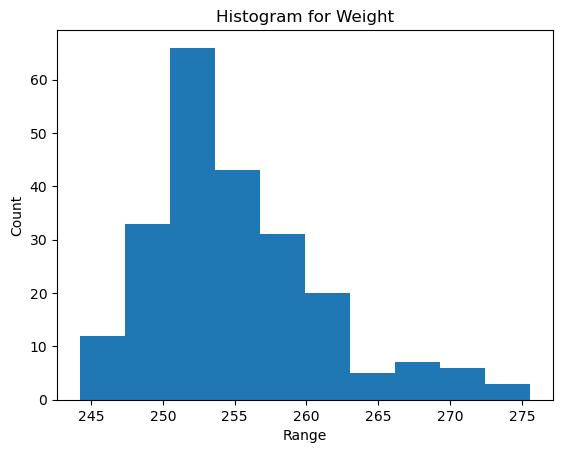

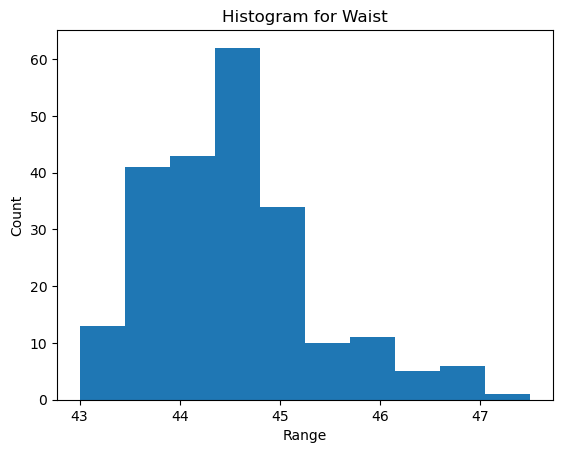

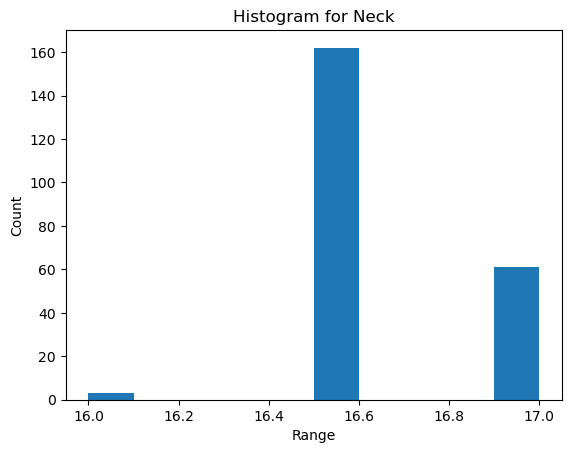

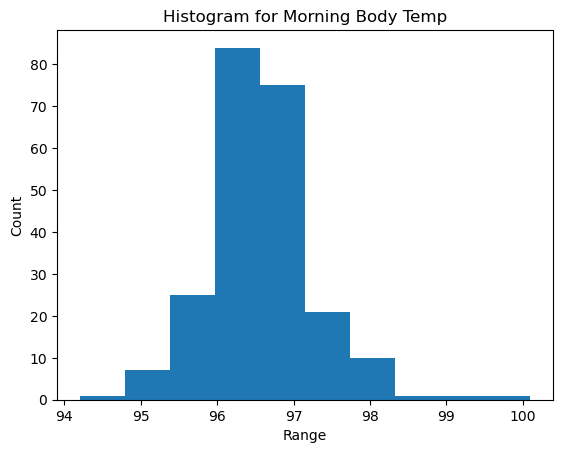

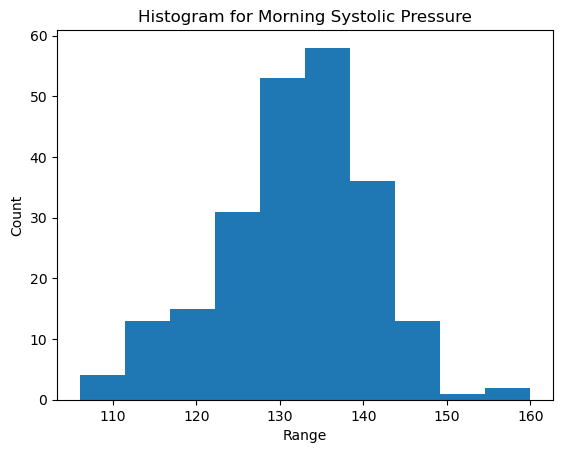

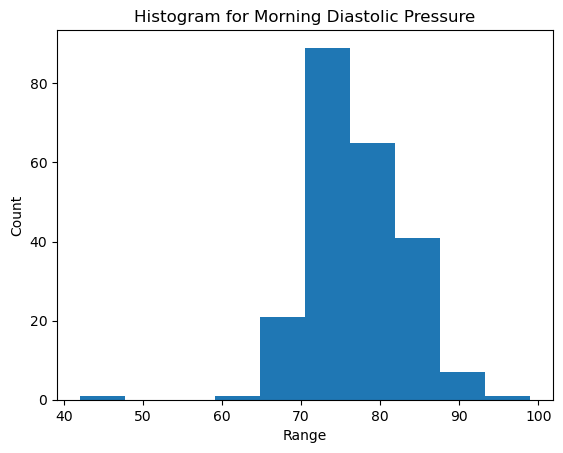

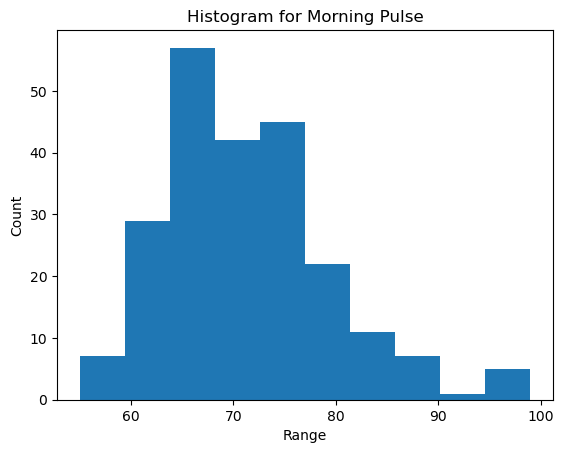

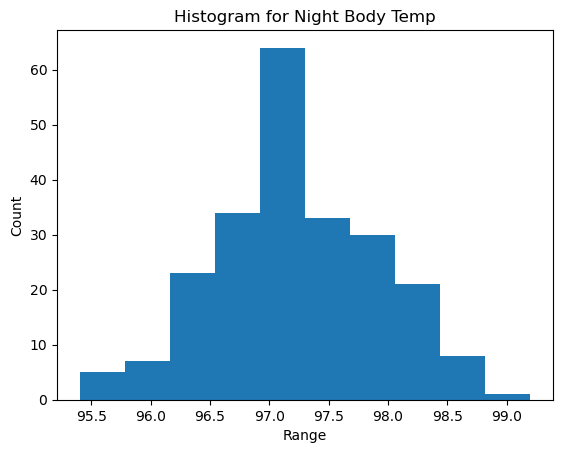

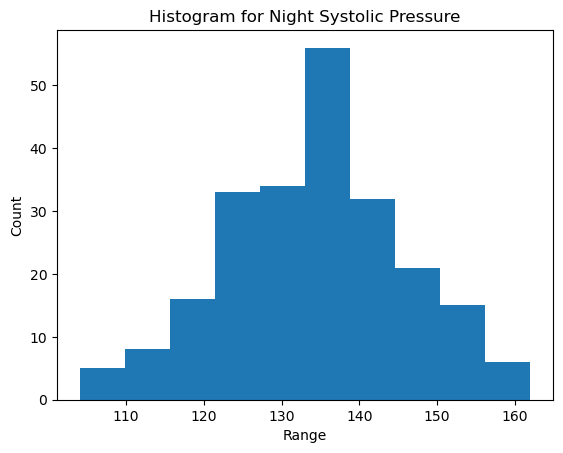

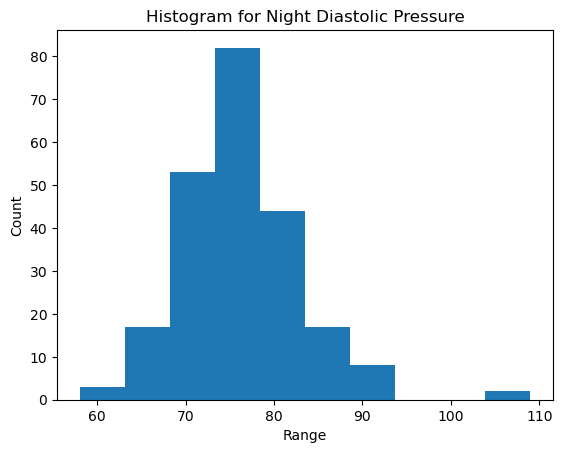

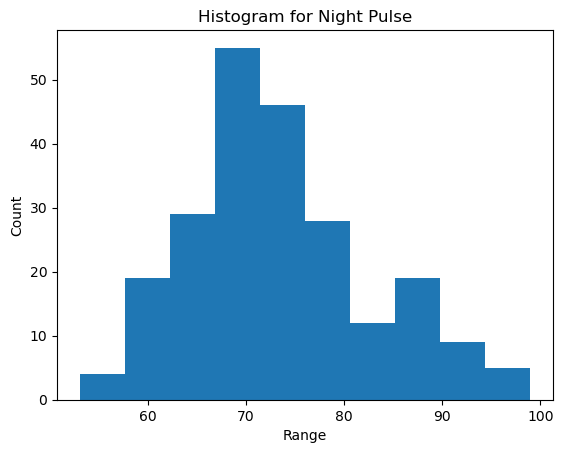

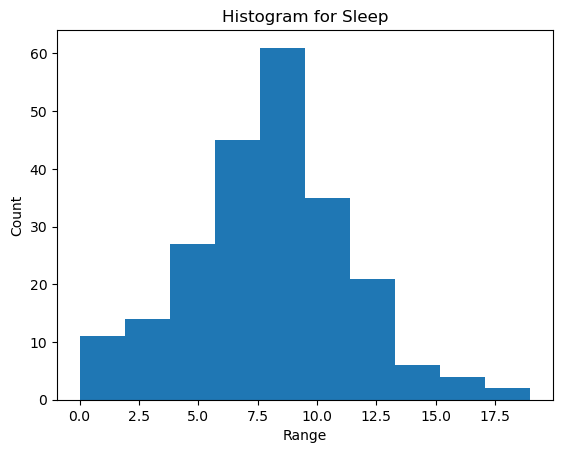

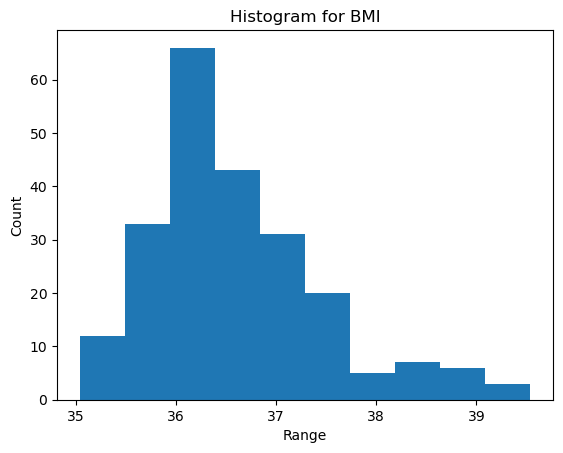

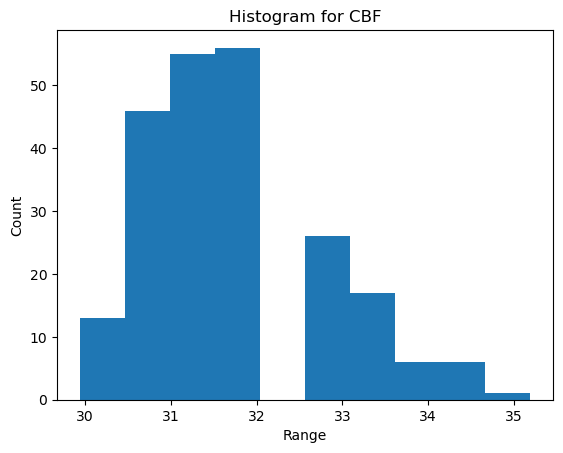

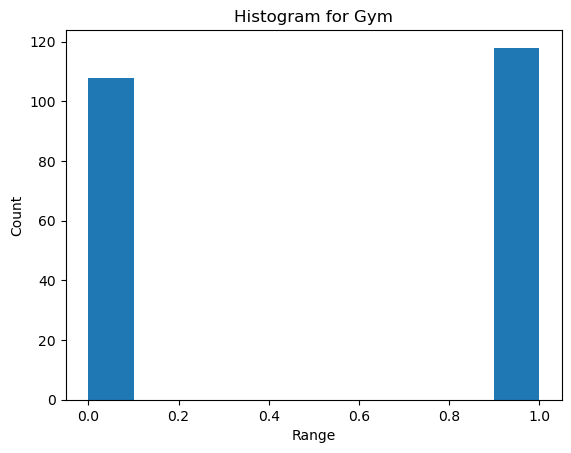

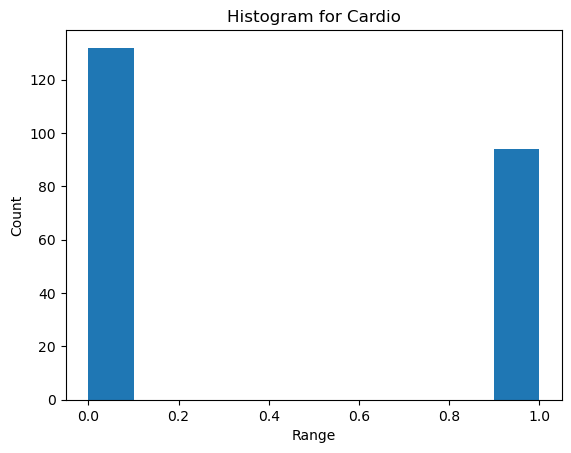

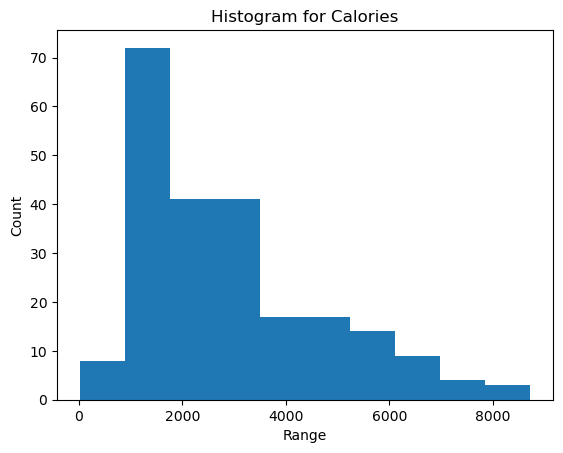

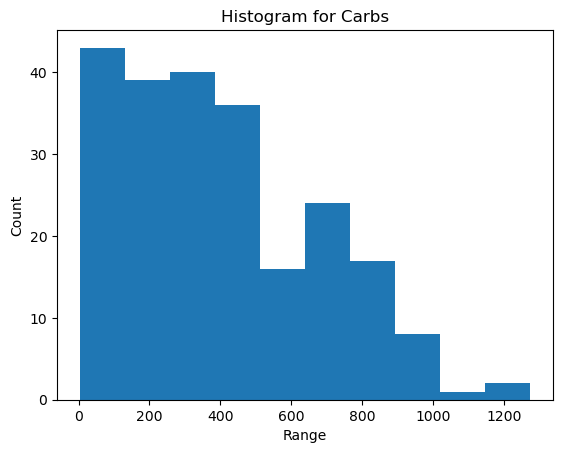

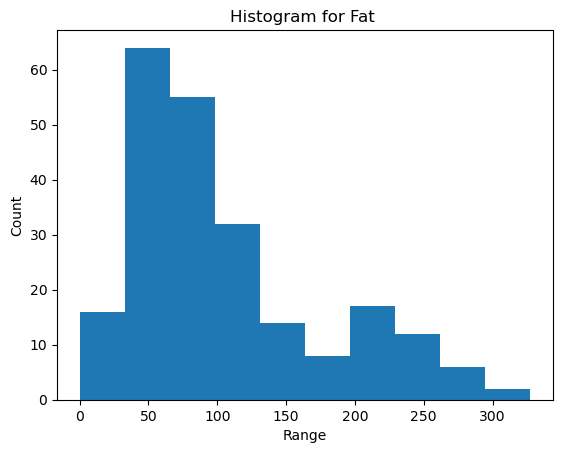

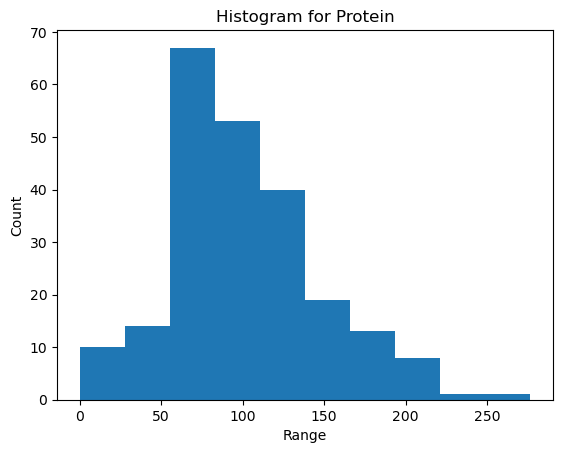

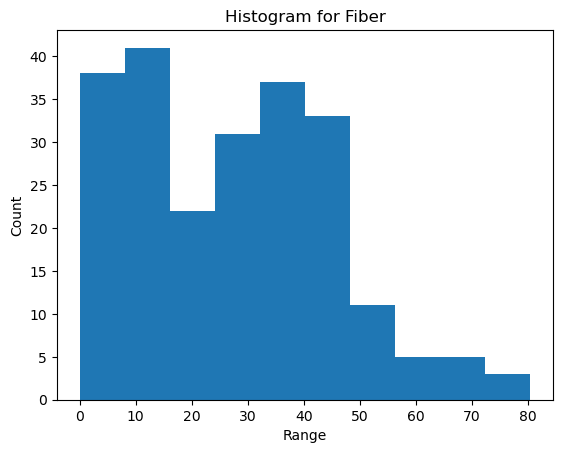

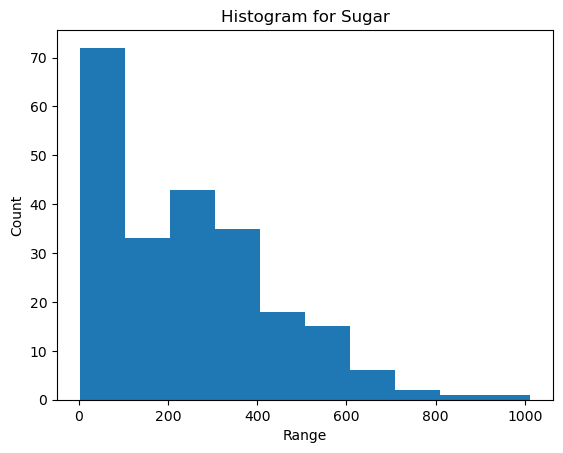

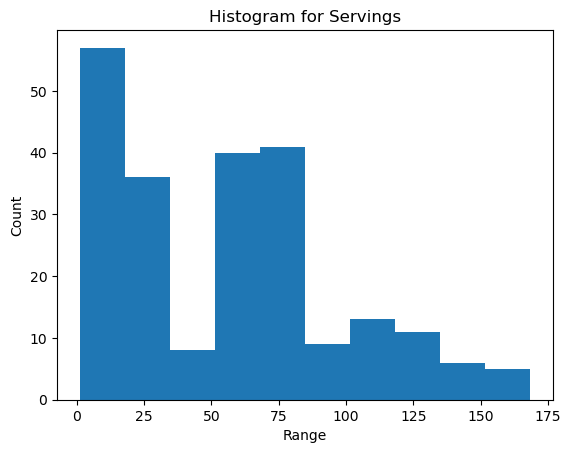

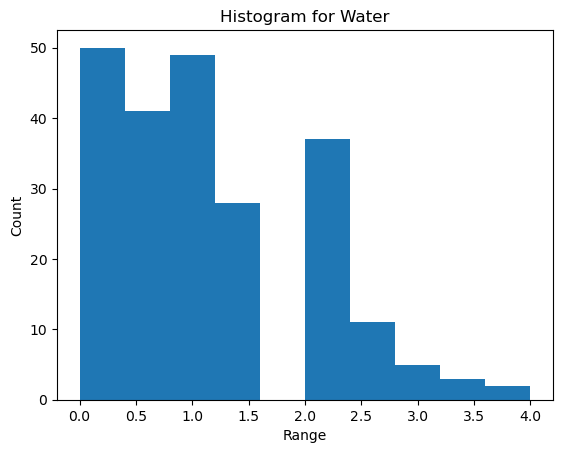

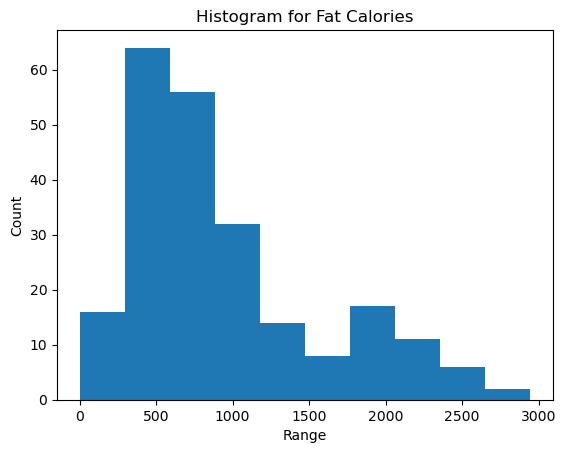

In [5]:
## Plain Histograms For All Variables
for i in subset:
    plt.hist(subset[i])
    plt.title(f'Histogram for {i}')
    plt.xlabel('Range')
    plt.ylabel('Count')
    plt.show()

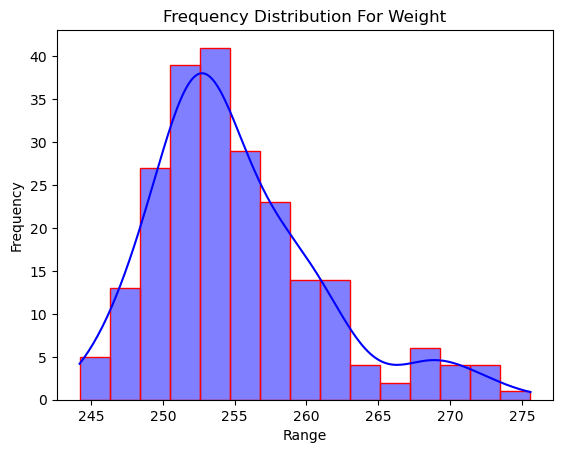

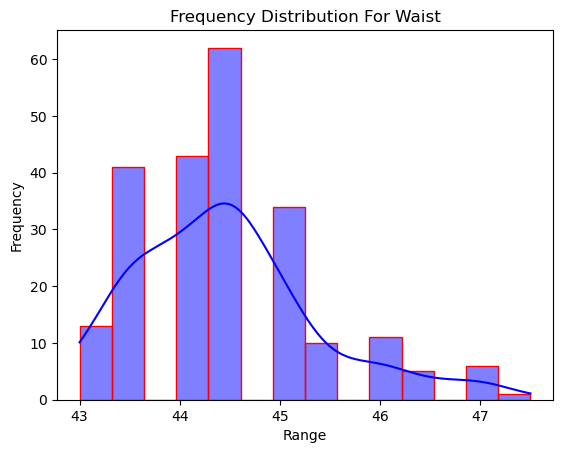

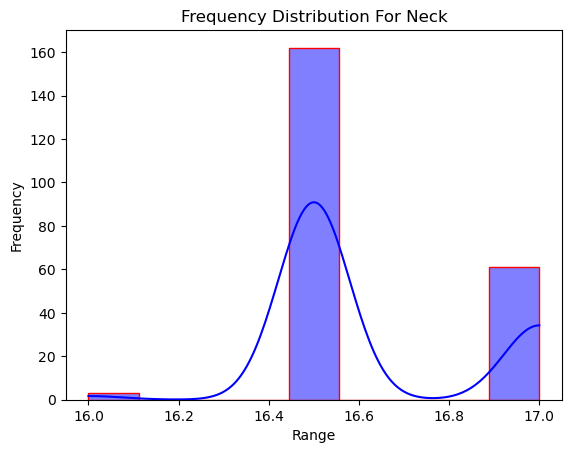

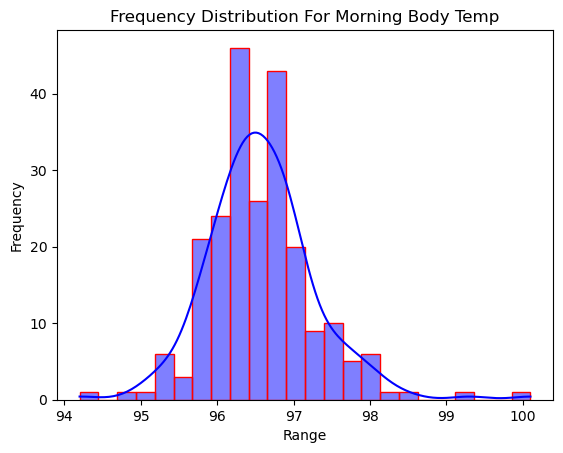

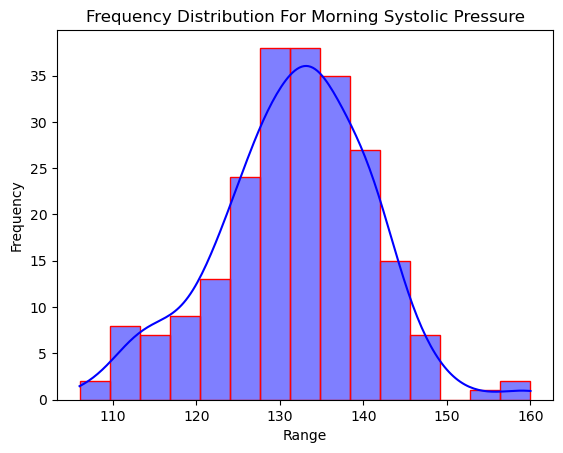

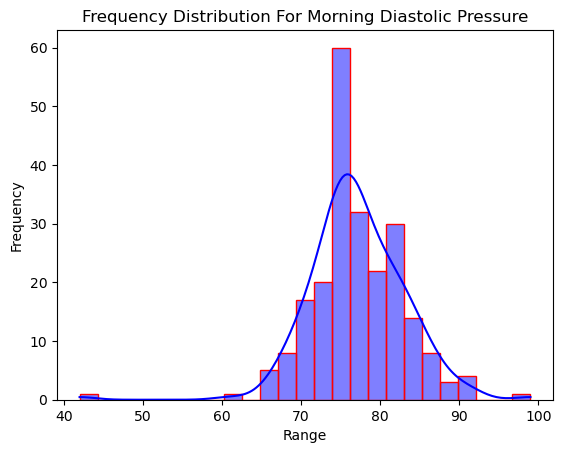

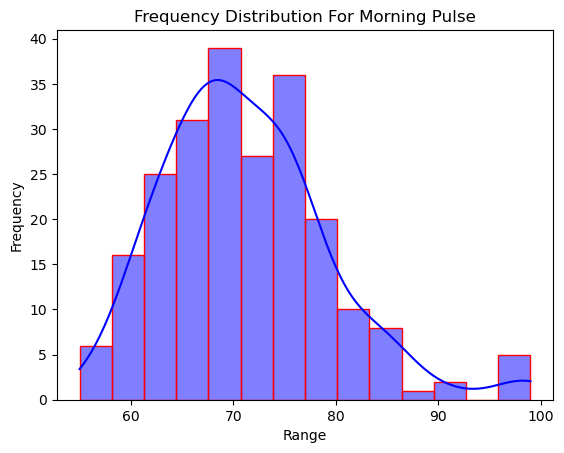

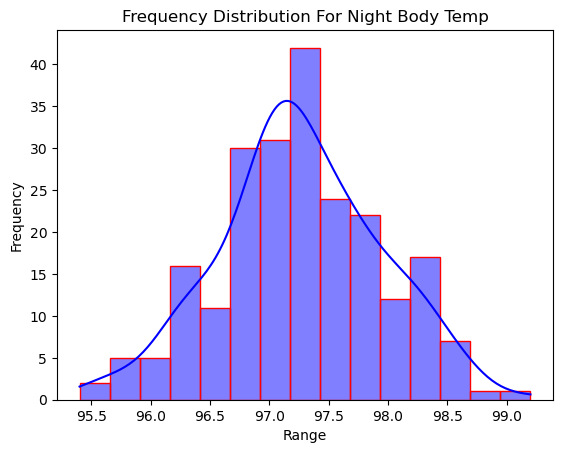

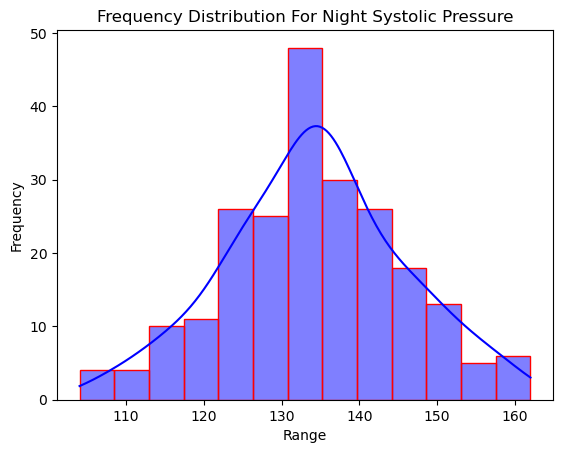

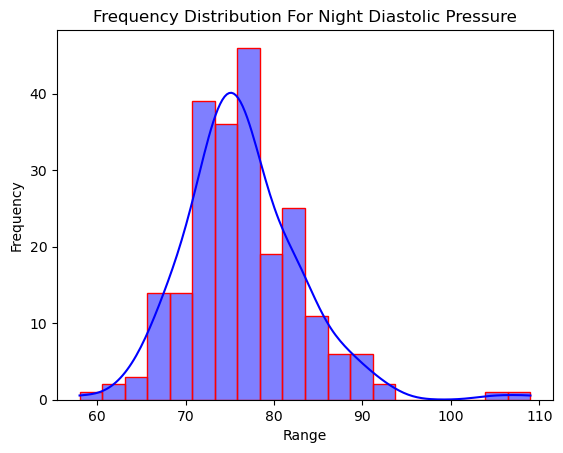

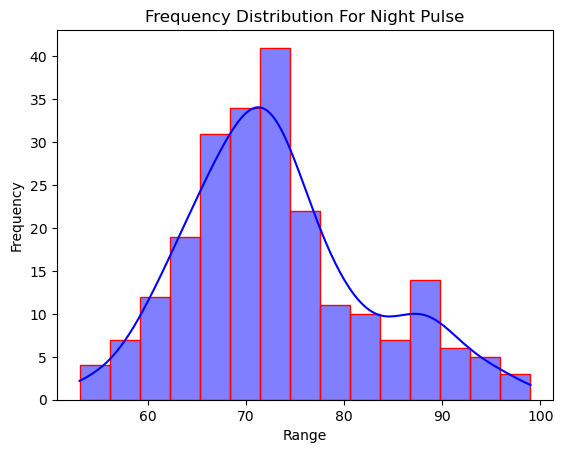

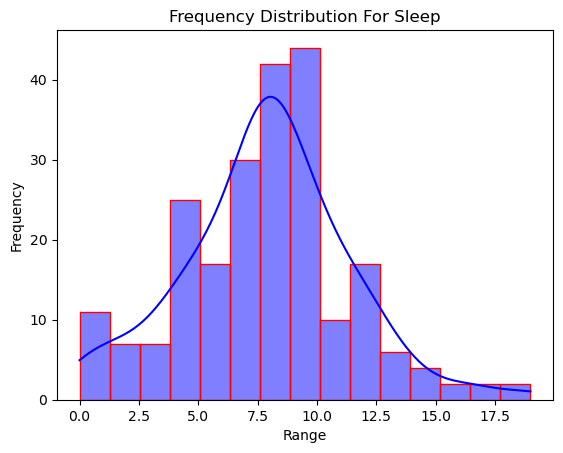

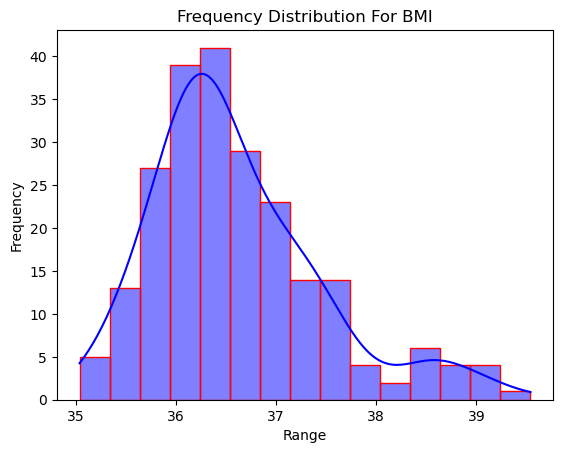

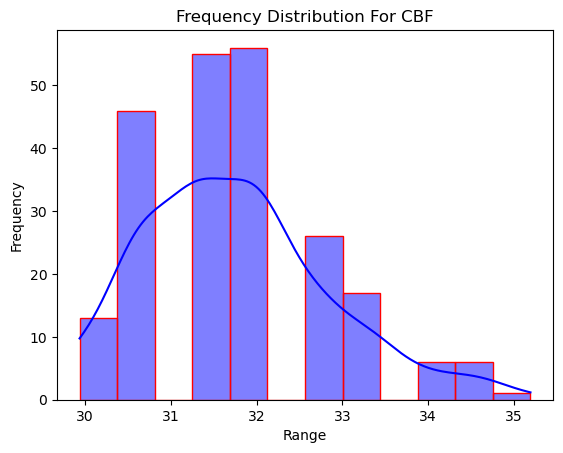

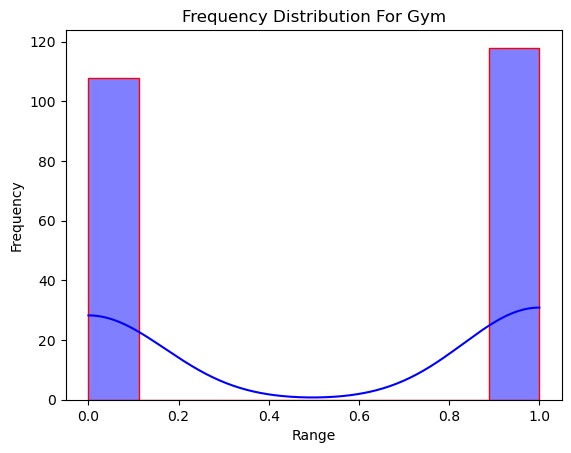

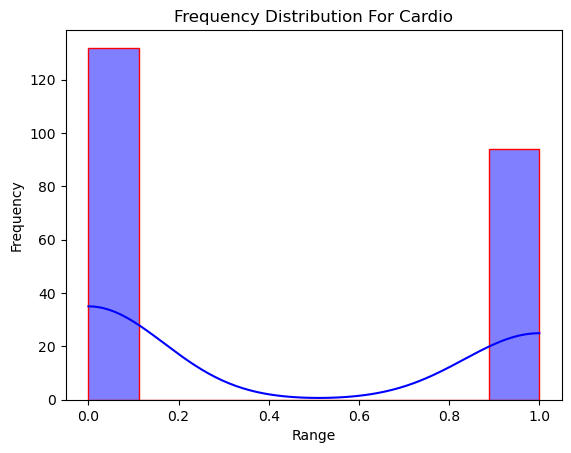

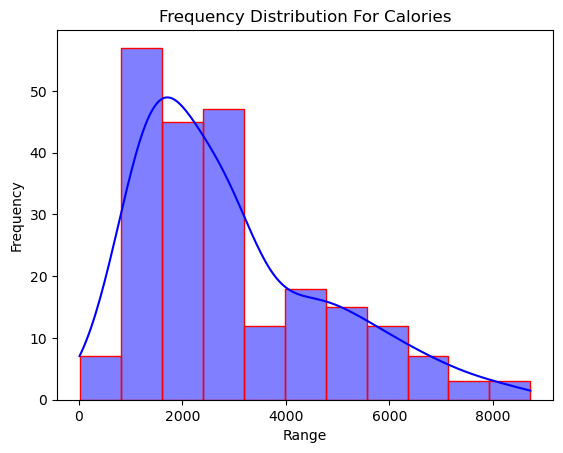

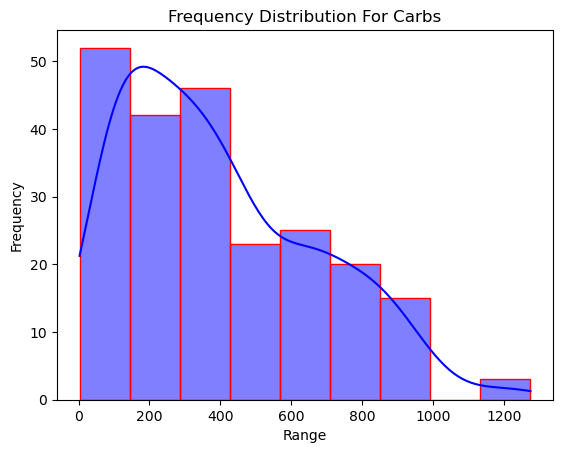

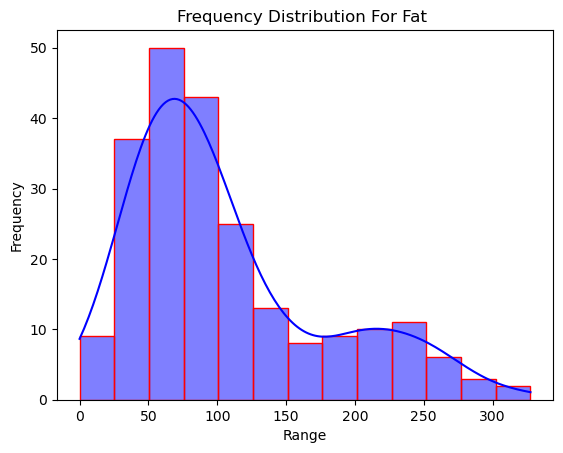

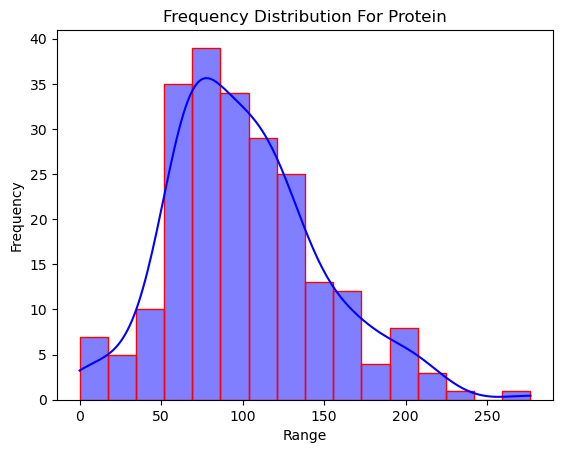

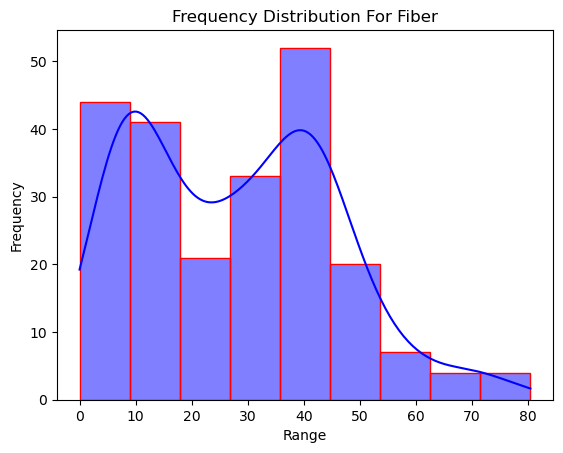

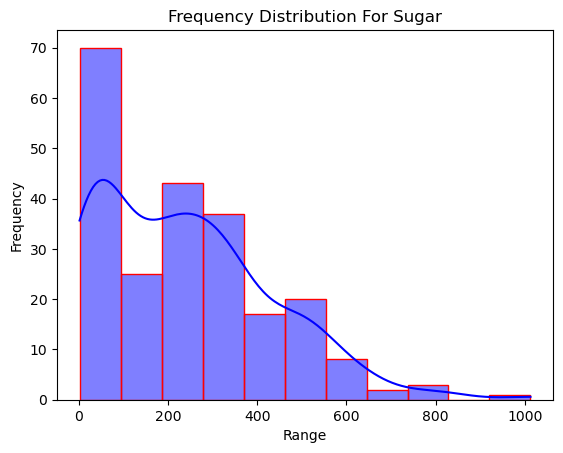

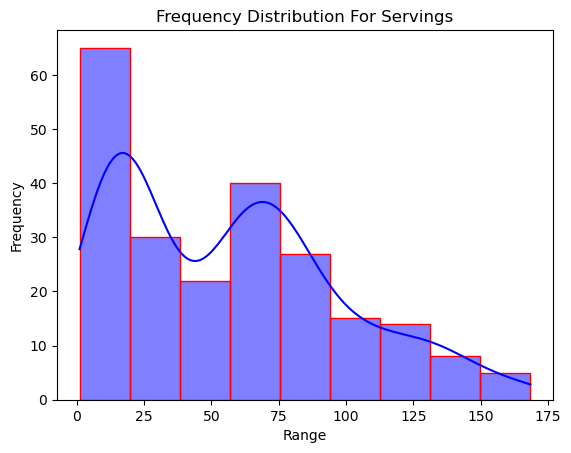

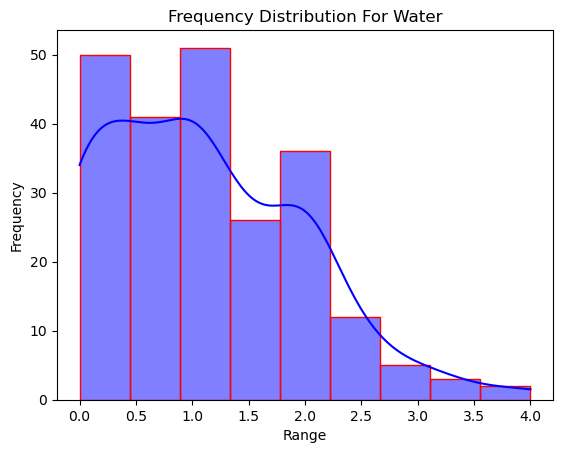

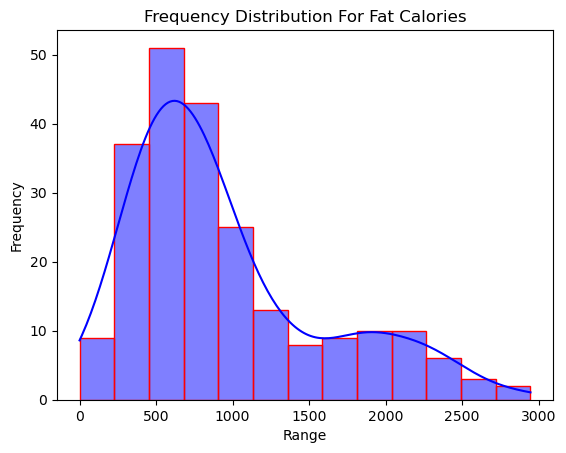

In [6]:
## Frequency Distributions For All Variables
for i in subset:
    p = sns.histplot(subset[i], kde=True, edgecolor='red', color='blue')
    p.set(title=f"Frequency Distribution For {i}", xlabel='Range', ylabel='Frequency')
    plt.show()

In [7]:
## Producing Z scores and P values for all variables
ZP = {}
for i in subset:
        mean = subset[i].mean()
        mode = subset[i].mode()
        std = subset[i].std()
        sqrt = math.sqrt(len(subset[i]))
        z = (mean - mode)/(std/sqrt)
        p = 2 * (1 - stats.norm.cdf(abs(z)))
        variable_name = f"{i}"
        ZP[variable_name] = [z[0], p[0]]
        
for key, values in ZP.items():
    print(f"{key} Z-Score and P-Value:, {values}")

Weight Z-Score and P-Value:, [5.342402735806226, 9.172258930156829e-08]
Waist Z-Score and P-Value:, [-0.7595390688345668, 0.4475301523419448]
Neck Z-Score and P-Value:, [8.257674563046816, 2.220446049250313e-16]
Morning Body Temp Z-Score and P-Value:, [3.7759205310289237, 0.00015941781543249434]
Morning Systolic Pressure Z-Score and P-Value:, [6.018075479421645, 1.765029011835395e-09]
Morning Diastolic Pressure Z-Score and P-Value:, [2.820921497266277, 0.004788591960323663]
Morning Pulse Z-Score and P-Value:, [5.968401673322524, 2.3958894868059133e-09]
Night Body Temp Z-Score and P-Value:, [1.2505906367966229, 0.21108386843208393]
Night Systolic Pressure Z-Score and P-Value:, [2.8782231543728662, 0.0039992212993722465]
Night Diastolic Pressure Z-Score and P-Value:, [3.2751678535548976, 0.001055992095164049]
Night Pulse Z-Score and P-Value:, [0.25928441849562534, 0.7954158006715017]
Sleep Z-Score and P-Value:, [-0.5998027277190366, 0.5486377152353041]
BMI Z-Score and P-Value:, [5.303630

In [8]:
## Producing 95% Confidence Intervals for all variables
for i in subset:
        mean = subset[i].mean()
        std = subset[i].std()
        sqrt = math.sqrt(len(subset[i]))
        Upper = mean + (1.96*(std/sqrt))
        Lower = mean - (1.96*(std/sqrt))
        print(i, 'CI:' , Lower, '-' , Upper)

Weight CI: 254.33908501545952 - 255.8910034801157
Waist CI: 44.33364875928465 - 44.57343088673304
Neck CI: 16.597861531923908 - 16.658775636217687
Morning Body Temp CI: 96.48599127824214 - 96.6716193412269
Morning Systolic Pressure CI: 130.46452993908375 - 132.8452045741906
Morning Diastolic Pressure CI: 76.34435333479962 - 77.91228383334197
Morning Pulse CI: 70.17231163900802 - 72.29671490966454
Night Body Temp CI: 97.16787203086065 - 97.34540230542254
Night Systolic Pressure CI: 132.70298277046217 - 135.7040968755555
Night Diastolic Pressure CI: 75.57923765038787 - 77.30571810182452
Night Pulse CI: 71.95516109998768 - 74.36342297080877
Sleep CI: 7.405159985294539 - 8.31607895275856
BMI CI: 36.489885735766734 - 36.712503644764226
CBF CI: 31.606448906516405 - 31.889126314722517
Gym CI: 0.4568545487866116 - 0.587393238824008
Cardio CI: 0.35152603039843566 - 0.4803323766812103
Calories CI: 2678.5203943284077 - 3150.191021196706
Carbs CI: 362.2395429852829 - 433.4504113526166
Fat  CI: 96.

In [9]:
## Producing Correlation Coefficients For All Relationships Between Weight and the Remaining Variables
for i in subset:
    data = {'x': subset[i], 'y': subset['Weight']}
    df = pd.DataFrame(data)
    corr= df.corr()
    coef = corr.loc['x', 'y']
    print(f"Correlation for Weight and {i}: {coef}")

Correlation for Weight and Weight: 1.0
Correlation for Weight and Waist: 0.8819185501588241
Correlation for Weight and Neck: 0.5573789099787486
Correlation for Weight and Morning Body Temp: 0.08420511486622119
Correlation for Weight and Morning Systolic Pressure: -0.06914935178778603
Correlation for Weight and Morning Diastolic Pressure: 0.10238987585293441
Correlation for Weight and Morning Pulse: -0.0025020485112239666
Correlation for Weight and Night Body Temp: 0.1174787900910128
Correlation for Weight and Night Systolic Pressure: -0.1984955177948766
Correlation for Weight and Night Diastolic Pressure: -0.0453512710293936
Correlation for Weight and Night Pulse: 0.04766084445037078
Correlation for Weight and Sleep: 0.09258586192686509
Correlation for Weight and BMI: 0.9999943410823152
Correlation for Weight and CBF: 0.8319019815239077
Correlation for Weight and Gym: 0.06209047244623576
Correlation for Weight and Cardio: 0.18410764113091682
Correlation for Weight and Calories: -0.1242

In [10]:
## Producing Correlation Coefficients For All Relationships Between Waist and the Remaining Variables
for i in subset:
    data = {'x': subset[i], 'y': subset['Waist']}
    df = pd.DataFrame(data)
    corr= df.corr()
    coef = corr.loc['x', 'y']
    print(f"Correlation for Waist and {i}: {coef}")

Correlation for Waist and Weight: 0.8819185501588236
Correlation for Waist and Waist: 1.0
Correlation for Waist and Neck: 0.5502813498421509
Correlation for Waist and Morning Body Temp: 0.14822563633139518
Correlation for Waist and Morning Systolic Pressure: -0.10514674051999119
Correlation for Waist and Morning Diastolic Pressure: 0.03685120996691621
Correlation for Waist and Morning Pulse: -0.007437760403958855
Correlation for Waist and Night Body Temp: 0.05994813381484024
Correlation for Waist and Night Systolic Pressure: -0.1819841314139685
Correlation for Waist and Night Diastolic Pressure: -0.12289270288999779
Correlation for Waist and Night Pulse: -0.02869185159262348
Correlation for Waist and Sleep: 0.09136265227299006
Correlation for Waist and BMI: 0.8817377163271836
Correlation for Waist and CBF: 0.969674731235275
Correlation for Waist and Gym: 0.11085468200307062
Correlation for Waist and Cardio: 0.20906237158828797
Correlation for Waist and Calories: -0.18063622721596734
Co